<a href="https://colab.research.google.com/github/Slne-NPC/DSA207-Data-Analysis-Lab/blob/main/Crosstab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fish data

In [22]:
df = pd.read_csv("fishdata1.csv")
df.head()

,S.No,Year,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Temp,Humidity,Light,CO,Water Temp,pH
0,1,2019,11,26,10,27,20,8.0,12,14,25,91,34.0,95.0,24.63,6.52
1,2,2019,11,26,10,28,12,9.0,12,15,25,91,34.0,95.0,24.63,6.59
2,3,2019,11,26,10,29,4,10.0,14,15,26,89,34.0,95.0,24.63,6.53
3,4,2019,11,26,10,29,56,8.0,12,12,26,90,34.0,95.0,24.56,6.59
4,5,2019,11,26,10,30,43,9.0,12,15,26,91,34.0,95.0,24.56,6.54


In [26]:
df['Day'] = df.Day = 26
df = df[:100]
df

,S.No,Year,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Temp,Humidity,Light,CO,Water Temp,pH
0,1,2019,11,26,10,27,20,8.0,12,14,25,91,34.0,95.0,24.63,6.52
1,2,2019,11,26,10,28,12,9.0,12,15,25,91,34.0,95.0,24.63,6.59
2,3,2019,11,26,10,29,4,10.0,14,15,26,89,34.0,95.0,24.63,6.53
3,4,2019,11,26,10,29,56,8.0,12,12,26,90,34.0,95.0,24.56,6.59
4,5,2019,11,26,10,30,43,9.0,12,15,26,91,34.0,95.0,24.56,6.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2019,11,26,11,48,41,5.0,8,13,27,88,34.0,95.0,24.19,6.55
96,97,2019,11,26,11,49,29,4.0,8,11,27,90,34.0,95.0,24.19,6.51
97,98,2019,11,26,11,50,16,4.0,8,9,27,88,34.0,95.0,24.19,6.55
98,99,2019,11,26,11,51,4,3.0,7,7,29,90,34.0,95.0,24.13,6.52


In [27]:
# 1.
pd.crosstab(df.Day, df.PM1)

PM1,0.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Day,,,,,,,,,
26,7,1,6,29,1,26,24,5,1


In [28]:
# 2.
df.groupby(['Day', 'PM1'])['PM1'].count().unstack().fillna(0)

PM1,0.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Day,,,,,,,,,
26,7,1,6,29,1,26,24,5,1


In [29]:
# 3.
df.pivot_table(index='Day', columns='PM1', aggfunc={'PM1':len}, fill_value=0)

PM1                                        
PM1 0.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0
Day                                             
26     7    1    6   29    1   26   24    5    1

# Student survey

In [38]:
df = pd.read_csv("TNIstudent1.csv")
df.head(3)

,Unnamed: 0,Gender,Degree,Major,Birth date,Transpotation,Fav food shop in TNI,Fav food shop near TNI,Fav beverage shop,Fav vendor machine,...,Stress from lecturer,Stress from family,Job satisfied by TNI,Languages satisfied by TNI,First aid room satisfy,Library satisfy,Wifi satissfy,Speed of priting service satisfly,Cooperative shop satisfly,Overall option about TNI
0,0,M,Undergraduate,DSA,2001,Walk,Hainanese chicken rice,Steak Kru Pearch,Emu,7-11,...,3,4,4,3,3,4,4,3,Sometimes,4
1,1,M,Undergraduate,DGE,2004,Walk,Japanese food,Pha Nit,Emu,7-11,...,1,2,5,5,3,5,4,4,Sometimes,5
2,2,F,Undergraduate,JIB,2004,Car,Snack shop,7-11,Coffee Building B,7-11,...,2,2,5,5,3,3,4,5,Always,5


In [43]:
# 1.
pd.crosstab(df.Major, df['Birth date'])

Birth date,1973,1994,1996,1999,2000,2001,2002,2003,2004
Major,,,,,,,,,
BI,0,0,0,0,1,0,0,0,0
DGE,0,0,0,0,0,0,0,2,1
DSA,0,0,0,0,3,4,4,0,0
IBN,0,0,0,1,1,0,0,1,2
IT,0,0,0,0,0,1,0,0,0
JIB,0,0,0,0,0,0,0,0,1
MET,1,0,0,0,0,0,0,0,0
MIT,0,1,1,0,0,0,0,0,0
MT,0,0,0,0,0,0,0,4,2


In [45]:
# 2.
df.groupby(['Major', 'Birth date'])['Birth date'].count().unstack().fillna(0)

Birth date,1973,1994,1996,1999,2000,2001,2002,2003,2004
Major,,,,,,,,,
BI,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
DGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
DSA,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0
IBN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0
IT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
JIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
MET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MIT,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0


In [46]:
# 3.
df.pivot_table(index='Major', columns='Birth date', aggfunc={'Birth date':len}, fill_value=0)

Birth date                                        
Birth date       1973 1994 1996 1999 2000 2001 2002 2003 2004
Major                                                        
BI                  0    0    0    0    1    0    0    0    0
DGE                 0    0    0    0    0    0    0    2    1
DSA                 0    0    0    0    3    4    4    0    0
IBN                 0    0    0    1    1    0    0    1    2
IT                  0    0    0    0    0    1    0    0    0
JIB                 0    0    0    0    0    0    0    0    1
MET                 1    0    0    0    0    0    0    0    0
MIT                 0    1    1    0    0    0    0    0    0
MT                  0    0    0    0    0    0    0    4    2

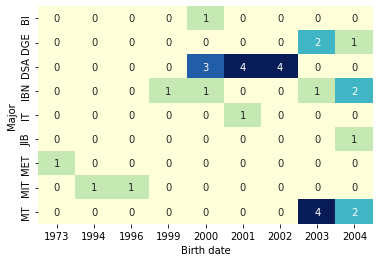

In [57]:
sns.heatmap(pd.crosstab([df['Major']], df['Birth date']),cmap="YlGnBu", annot=True, cbar=False)
plt.show()